In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [177]:
df_koi = pd.read_csv(r'..\data\koi\koi.csv')
df_toi = pd.read_csv(r'..\data\toi\toi.csv')
df_k2 = pd.read_csv(r'..\data\k2\k2.csv')

## KOI (Kepler)

In [178]:
koi_useful_columns = ['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_period',
                  'koi_impact', 'koi_duration', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq',
                  'koi_insol', 'koi_dor', 'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_max_sngle_ev', 'koi_max_mult_ev',
                  'koi_model_snr', 'koi_count', 'koi_num_transits', 'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass', 'ra',
                  'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']

koi_useful_columns = ['koi_disposition', 'koi_pdisposition', 'koi_period',
                  'koi_impact', 'koi_duration', 'koi_depth', 'koi_srho', 'koi_prad', 'koi_incl', 'koi_teq',
                  'koi_max_sngle_ev', 'koi_max_mult_ev',
                  'koi_model_snr', 'koi_steff', 'koi_smet', 'koi_srad', 'ra',
                  'dec', 'koi_kepmag']


koi_cleaned = df_koi[koi_useful_columns]

In [179]:
koi_fp = koi_cleaned[(koi_cleaned['koi_disposition'] == 'FALSE POSITIVE')|(koi_cleaned['koi_pdisposition'] == 'FALSE POSITIVE')]
koi_diff = koi_fp[koi_fp['koi_disposition'] != koi_fp['koi_pdisposition']]
diff_ind = koi_diff.index

In [180]:
df_koi

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.141910,0.000130,0.430,0.510,0.940,0.480,-0.000200,0.000320,-0.000550,0.000310,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.

In [181]:
koi_diff

,koi_disposition,koi_pdisposition,koi_period,koi_impact,koi_duration,koi_depth,koi_srho,koi_prad,koi_incl,koi_teq,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_steff,koi_smet,koi_srad,ra,dec,koi_kepmag
274,CONFIRMED,FALSE POSITIVE,38.478766,0.0030,5.04169,23530.0,3.73390,13.26,90.00,484.0,261.088380,1014.996300,1077.8,5510.0,0.16,0.879,288.90222,49.370491,13.779
519,CONFIRMED,FALSE POSITIVE,24.669193,0.0730,7.03515,7382.3,0.74047,77.76,89.85,1485.0,88.018220,431.797500,603.0,5313.0,0.56,9.327,297.00943,50.372318,13.224
778,CONFIRMED,FALSE POSITIVE,2.144632,1.2280,6.27010,19837.0,0.04677,59.19,56.90,1736.0,117.249420,1522.276200,334.8,6296.0,-0.16,1.305,293.35129,43.134640,13.480
953,CONFIRMED,FALSE POSITIVE,2.495780,0.1330,4.27210,25070.0,0.40804,15.75,88.51,1408.0,125.627360,1486.823400,171.4,6039.0,-0.28,0.992,296.50739,49.457291,14.152
2210,CONFIRMED,FALSE POSITIVE,51.206903,NaN,8.99000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.05954,44.518215,9.705
2244,FALSE POSITIVE,CANDIDATE,7.258450,0.0500,5.72970,3714.7,0.38297,5.53,89.72,880.0,30.843128,283.082820,288.6,5638.0,0.16,0.920,290.63651,38.707668,14.747
2767,CONFIRMED,FALSE POSITIVE,0.636425,0.3190,0.94700,217.9,5.77265,1.31,86.33,1846.0,4.038990,14.027986,18.1,5343.0,0.44,0.885,285.15692,47.873329,15.744
3043,CONFIRMED,FALSE POSITIVE,19.535255,0.7020,1.01300,1732.0,72.24881,0.53,89.65,161.0,3.110793,8.043725,5.9,2703.0,0.00,0.118,292.50378,41.830421,17.131
3385,CONFIRMED,FALSE POSITIVE,15.458057,0.0500,8.79536,4253.2,0.22765,9.11,89.80,871.0,99.721220,777.099400,1055.9,5868.0,0.10,1.407,290.44928,39.854801,13.398
7632,CONFIRMED,FALSE POSITIVE,11.322010,0.1749,5.86000,17.1,0.45954,0.91,89.38,1215.0,NaN,NaN,8.1,6003.0,-0.28,2.193,288.39529,39.872627,11.158


In [182]:
# Deleting rows with ambigious target value
koi_cleaned.drop(index = diff_ind, inplace = True)
koi_cleaned.drop(columns = ['koi_pdisposition'], inplace = True)

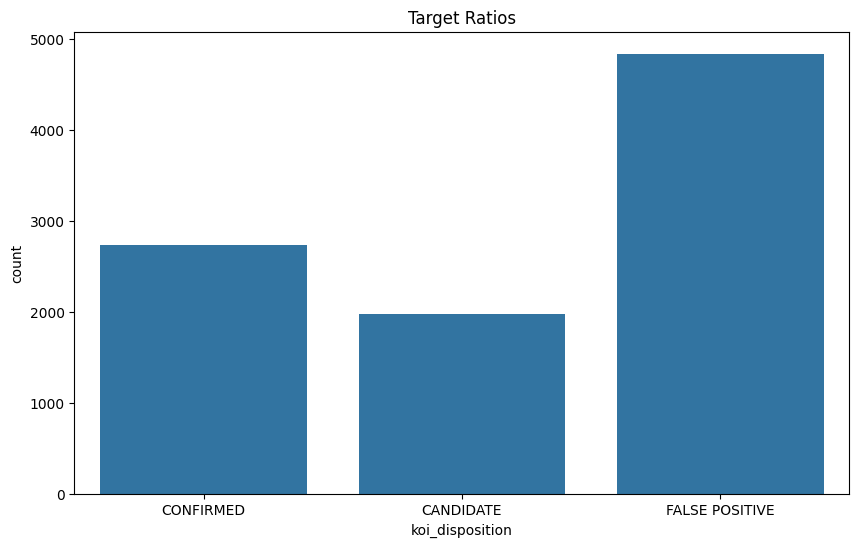

In [183]:
plt.figure(figsize = (10, 6))
plt.title('Target Ratios')
sns.countplot(data = koi_cleaned, x = 'koi_disposition')
plt.show()

In [184]:
#koi_cleaned.drop(columns = ['koi_score'], inplace = True)

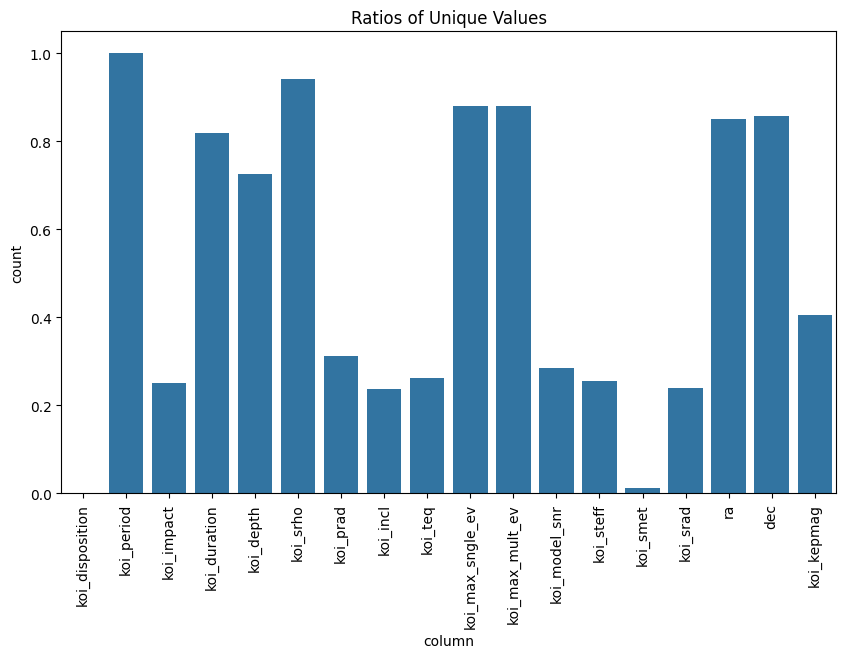

In [185]:
koi_nuniques =( koi_cleaned.nunique() / len(koi_cleaned)).reset_index(name = 'count')

plt.figure(figsize = (10, 6))
plt.title('Ratios of Unique Values')
plt.xticks(rotation = 90)
plt.xlabel('column')
ax = sns.barplot(data = koi_nuniques, x = 'index', y = 'count')
plt.show()

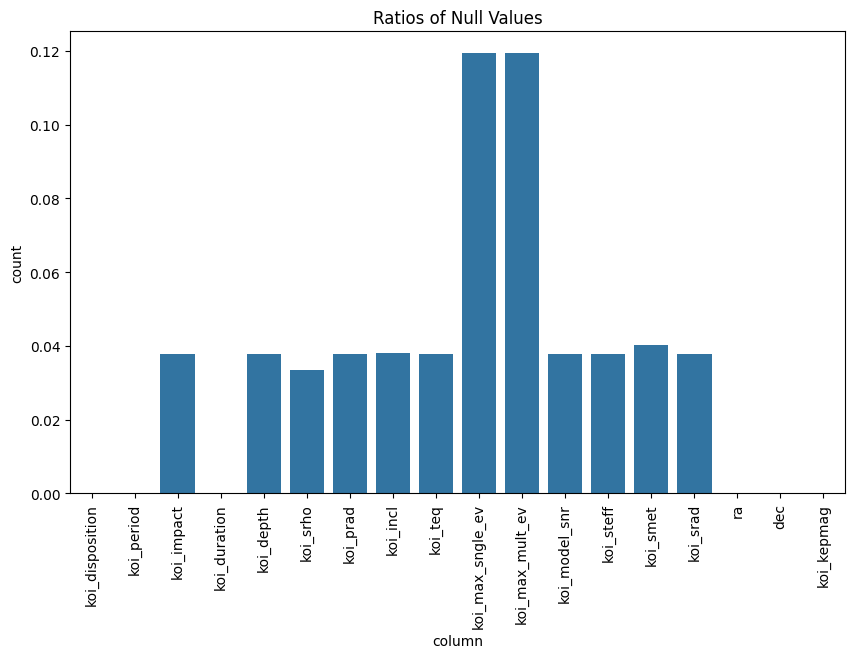

In [186]:
koi_nulls = (koi_cleaned.isna().sum() / len(koi_cleaned)).reset_index(name = 'count')

plt.figure(figsize = (10, 6))
plt.title('Ratios of Null Values')
plt.xticks(rotation = 90)
plt.xlabel('column')
ax = sns.barplot(data = koi_nulls, x = 'index', y = 'count')
plt.show()

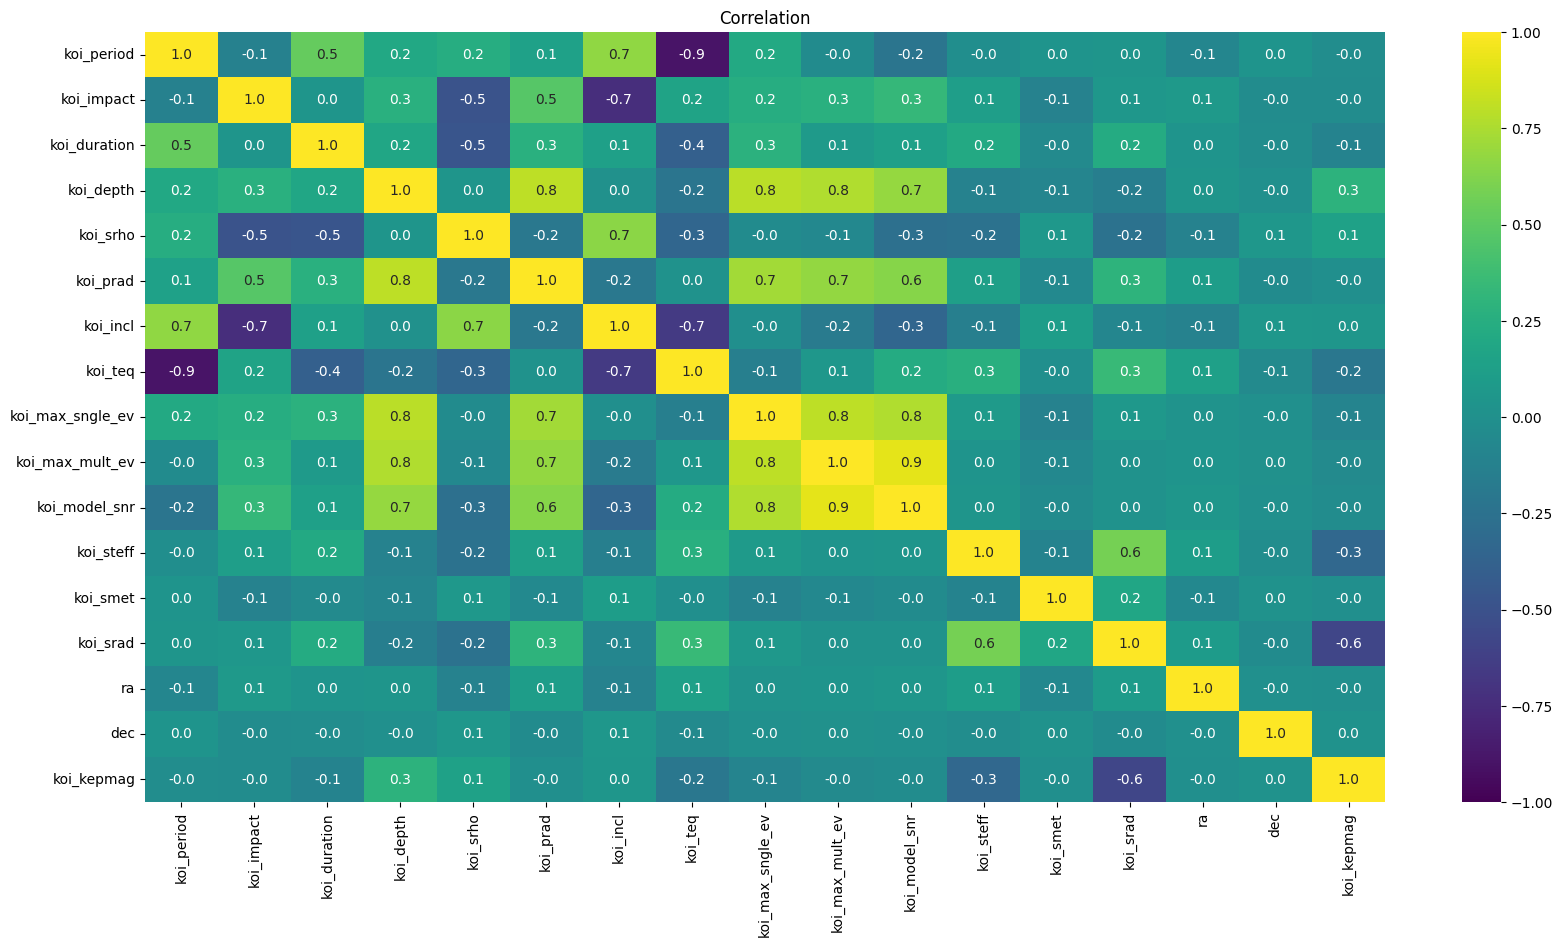

In [187]:
plt.figure(figsize = (20, 10))
plt.title('Correlation')
plt.xticks(rotation = 90)
plt.xlabel('column')
sns.heatmap(koi_cleaned.corr(method = 'spearman', numeric_only = True), vmin = -1, vmax = 1, cmap = 'viridis', annot = True, fmt = f'.1f')
plt.show()

In [188]:
koi_cleaned.corr(method = 'spearman', numeric_only = True)

,koi_period,koi_impact,koi_duration,koi_depth,koi_srho,koi_prad,koi_incl,koi_teq,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_steff,koi_smet,koi_srad,ra,dec,koi_kepmag
koi_period,1.000000,-0.126982,0.529921,0.195586,0.246990,0.134593,0.669128,-0.896638,0.208515,-0.042375,-0.221264,-0.015731,0.037588,0.039270,-0.082510,0.034103,-0.025663
koi_impact,-0.126982,1.000000,0.041124,0.272511,-0.485218,0.469609,-0.736410,0.157977,0.243862,0.271979,0.334465,0.117165,-0.121978,0.056868,0.075396,-0.033437,-0.032155
koi_duration,0.529921,0.041124,1.000000,0.187101,-0.474269,0.267795,0.128622,-0.391560,0.278298,0.085083,0.125533,0.210407,-0.047734,0.225439,0.033122,-0.028988,-0.101753
koi_depth,0.195586,0.272511,0.187101,1.000000,0.041510,0.803362,0.003060,-0.224159,0.789760,0.763614,0.683893,-0.112117,-0.092971,-0.152352,0.040099,-0.003765,0.282896
koi_srho,0.246990,-0.485218,-0.474269,0.041510,1.000000,-0.201255,0.650034,-0.346042,-0.040896,-0.065744,-0.271435,-0.247382,0.063722,-0.242194,-0.116674,0.057110,0.143861
koi_prad,0.134593,0.469609,0.267795,0.803362,-0.201255,1.000000,-0.202554,0.019041,0.721249,0.677200,0.640170,0.123103,-0.060661,0.291293,0.104122,-0.042583,-0.012729
koi_incl,0.669128,-0.736410,0.128622,0.003060,0.650034,-0.202554,1.000000,-0.662965,-0.010595,-0.174427,-0.344820,-0.143084,0.109263,-0.079552,-0.114572,0.057868,0.047491
koi_teq,-0.896638,0.157977,-0.391560,-0.224159,-0.346042,0.019041,-0.662965,1.000000,-0.146908,0.060388,0.222421,0.258808,-0.013951,0.347996,0.125068,-0.051246,-0.206377
koi_max_sngle_ev,0.208515,0.243862,0.278298,0.789760,-0.040896,0.721249,-0.010595,-0.146908,1.000000,0.801220,0.763546,0.082188,-0.121421,0.068753,0.025049,-0.004404,-0.096993
koi_max_mult_ev,-0.042375,0.271979,0.085083,0.763614,-0.065744,0.677200,-0.174427,0.060388,0.801220,1.000000,0.915431,0.035669,-0.064930,0.012615,0.036965,0.003925,-0.048677


In [189]:
corr_columns = []
corr_matrix = koi_cleaned.corr(method = 'spearman', numeric_only = True)
for col in corr_matrix.columns:
    corr = sum(np.abs(corr_matrix[col]) >= 0.9)
    if corr >= 2:
        corr_columns.append(col)

In [190]:
corr_features = koi_cleaned[corr_columns]

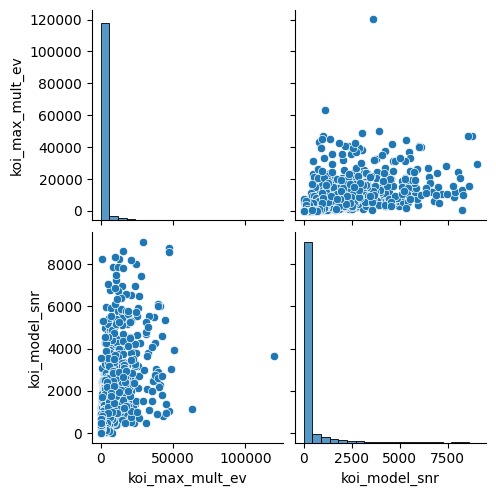

In [191]:
sns.pairplot(corr_features, diag_kind="hist", diag_kws={"bins": 20})

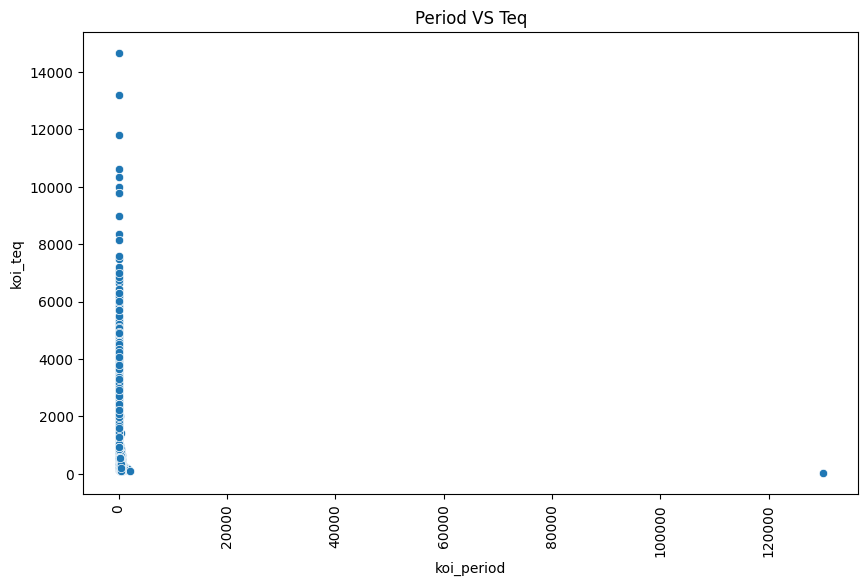

In [192]:
plt.figure(figsize = (10,6))
plt.title('Period VS Teq')
plt.xticks(rotation = 90)
sns.scatterplot(data = koi_cleaned, x = 'koi_period', y = 'koi_teq')
plt.show()

In [193]:
koi_cleaned.drop(columns = ['koi_teq'], inplace = True)

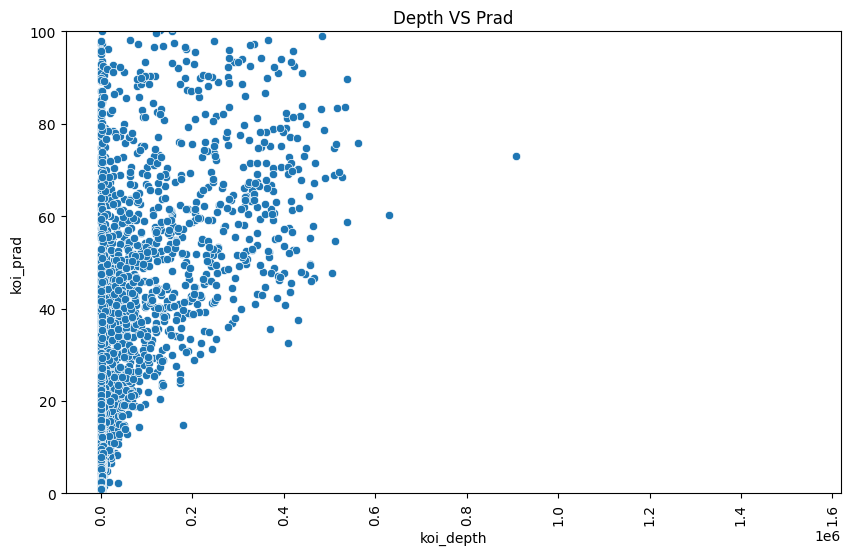

In [194]:
plt.figure(figsize = (10,6))
plt.title('Depth VS Prad')
plt.ylim(0, 100)
plt.xticks(rotation = 90)
sns.scatterplot(data = koi_cleaned, x = 'koi_depth', y = 'koi_prad')
plt.show()

## TOI

In [195]:
toi_useful_columns = ['pl_pnum', 'tfopwg_disp', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra', 'st_pmdec', 'pl_tranmid', 'pl_orbper', 'pl_trandurh',
                      'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad']

In [196]:
toi_cleaned = df_toi[toi_useful_columns]

In [197]:
toi_cleaned

,pl_pnum,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad
0,1,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,-0.076,2.459230e+06,2.171348,2.017220,656.886099,5.818163,22601.948581,3127.204052,9.604000,485.735,10249.0,4.19,2.169860
1,1,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,-15.555,2.459988e+06,1.931646,3.166000,1286.000000,11.215400,44464.500000,4045.000000,9.423440,295.862,7070.0,4.03,2.010000
2,1,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,-2.249,2.459225e+06,1.867557,1.408000,1500.000000,23.752900,2860.610000,2037.000000,9.299501,943.109,8924.0,NaN,5.730000
3,1,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,1.640,2.458493e+06,2.743230,3.167000,383.410000,NaN,1177.360000,1631.000000,9.300300,7728.170,5388.5,4.15,NaN
4,1,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,9.347,2.459987e+06,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,9.135500,356.437,9219.0,4.14,2.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,1,FP,07h23m14.75s,110.811443,+05d33m46.26s,5.562850,2.061,-7.082,2.458494e+06,3.443800,2.572000,7260.750000,NaN,1413.670000,1708.000000,10.078100,1080.880,4805.2,NaN,NaN
7695,1,FP,07h57m23.99s,119.349948,-19d30m57.65s,-19.516015,-3.900,3.866,2.458495e+06,14.537800,6.826000,4040.000000,16.052300,NaN,NaN,9.792500,379.693,8007.0,NaN,2.050000
7696,1,FP,08h05m16.69s,121.319521,-59d34m47.27s,-59.579798,-44.770,-2.616,2.459230e+06,8.413486,3.556833,17479.605331,20.510696,127.916421,857.731431,9.772700,113.667,5786.0,4.52,0.926261
7697,1,FP,07h53m16.69s,118.319555,-14d13m07.76s,-14.218823,-1.706,-1.714,2.459230e+06,0.941436,1.360700,339.912662,4.529209,41562.587811,3641.626449,9.695200,482.278,8322.0,4.01,2.349860


## K2

In [198]:
k2_useful_columns = ['disposition', 'sy_snum', 'sy_pnum', 'rv_flag', 'tran_flag',
                     'micro_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_masse', 'pl_massj', 'pl_msinie',
                     'pl_msinij', 'pl_cmasse', 'pl_cmassj', 'pl_bmasse', 'pl_bmassj', 'pl_dens', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'pl_orbincl', 'pl_tranmid',
                     'ttv_flag', 'pl_imppar', 'pl_trandep', 'pl_trandur', 'pl_ratdor', 'pl_ratror', 'pl_orbtper', 'pl_orblper', 'pl_rvamp',
                     'pl_projobliq', 'pl_trueobliq', 'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_metratio', 'st_lum', 'st_logg', 'st_age',
                     'st_dens', 'st_vsin', 'st_rotp', 'st_radv', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'rastr', 'decstr', 'ra', 'dec', 'glat', 'glon',
                     'elat', 'elon', 'sy_bmag', 'sy_vmag', 'sy_jmag', 'sy_hmag', 'sy_gmag', 'sy_rmag', 'sy_imag', 'sy_zmag', 'sy_w1mag',
                     'sy_w2mag', 'sy_w3mag', 'sy_w4mag', 'sy_gaiamag', 'sy_tmag', 'sy_kepmag']

In [199]:
k2_cleaned = df_k2[k2_useful_columns]

In [200]:
k2_cleaned

,disposition,sy_snum,sy_pnum,rv_flag,tran_flag,micro_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_rotp,st_radv,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,rastr,decstr,ra,dec,glat,glon,elat,elon,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_tmag,sy_kepmag
0,CONFIRMED,1,1,1,1,0,41.688644,NaN,2.355454,0.210139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.52554,2.457069e+06,0,NaN,NaN,NaN,54.721028,0.022586,NaN,NaN,NaN,NaN,NaN,NaN,5703.00,0.956122,0.963861,-0.06,[Fe/H],NaN,4.38000,NaN,NaN,NaN,NaN,NaN,63.053943,36.5714,-51.3647,179.4610,5.54366,03h34m36.27s,+20d35m56.47s,53.651123,20.599021,-28.05348,166.79660,1.31208,56.28872,11.765,10.849,9.770001,9.432,NaN,NaN,NaN,NaN,9.310,9.344,9.332,8.976,10.86440,10.4021,11.040
1,CONFIRMED,1,1,1,1,0,41.685500,0.24100,2.230000,0.198947,16.3000,0.051285,NaN,NaN,NaN,NaN,16.3000,0.051285,7.89,0.000,NaN,546.00,89.55000,2.457152e+06,0,NaN,NaN,NaN,55.800000,0.022040,NaN,NaN,3.10,NaN,NaN,G,5766.00,0.928000,0.961000,-0.15,[Fe/H],-0.05552,4.50000,3.34,1.700000,3.3,NaN,-20.33638,63.053943,36.5714,-51.3647,179.4610,5.54366,03h34m36.27s,+20d35m56.47s,53.651123,20.599021,-28.05348,166.79660,1.31208,56.28872,11.765,10.849,9.770001,9.432,NaN,NaN,NaN,NaN,9.310,9.344,9.332,8.976,10.86440,10.4021,11.040
2,CONFIRMED,1,1,1,1,0,41.685500,NaN,2.578070,0.230000,22.2481,0.070000,NaN,NaN,NaN,NaN,22.2481,0.070000,NaN,0.000,NaN,NaN,89.55000,NaN,0,NaN,0.049000,NaN,55.800000,NaN,NaN,NaN,3.10,NaN,NaN,NaN,5766.00,1.080000,1.670000,-0.15,[Fe/H],NaN,4.50000,NaN,1.890000,NaN,NaN,NaN,63.053943,36.5714,-51.3647,179.4610,5.54366,03h34m36.27s,+20d35m56.47s,53.651123,20.599021,-28.05348,166.79660,1.31208,56.28872,11.765,10.849,9.770001,9.432,NaN,NaN,NaN,NaN,9.310,9.344,9.332,8.976,10.86440,10.4021,11.040
3,CANDIDATE,1,0,0,1,0,2.301830,NaN,1.120000,0.099900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1054.00,NaN,2.457583e+06,0,0.420,2.268000,1.900800,11.800000,0.014400,NaN,NaN,NaN,NaN,NaN,NaN,4616.52,0.762602,0.730000,-0.03,[M/H],-0.62345,4.53679,NaN,2.320574,NaN,NaN,NaN,73.413760,-70.2608,-21.2838,97.1795,10.26160,12h15m23.10s,-06d16m05.98s,183.846245,-6.268329,55.48289,286.98079,-4.22377,186.01709,12.737,11.727,9.873000,9.391,NaN,NaN,NaN,NaN,9.186,9.243,9.183,8.200,11.39950,10.7606,11.363
4,CANDIDATE,1,0,0,1,0,2.302368,NaN,1.312588,0.120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.44384,2.457583e+06,0,NaN,NaN,NaN,12.619867,0.016925,NaN,NaN,NaN,NaN,NaN,NaN,4720.00,0.710995,NaN,-0.06,[Fe/H],NaN,4.50000,NaN,NaN,NaN,NaN,NaN,73.413760,-70.2608,-21.2838,97.1795,10.26160,12h15m23.10s,-06d16m05.98s,183.846245,-6.268329,55.48289,286.98079,-4.22377,186.01709,12.737,11.727,9.873000,9.391,NaN,NaN,NaN,NaN,9.186,9.243,9.183,8.200,11.39950,10.7606,11.363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,CONFIRMED,2,1,1,1,0,2.655676,NaN,11.100000,0.990000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.456813e+06,0,NaN,1.487700,2.617200,7.834000,0.115120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.021443,-77.2399,11.0156,141.8870,7.01970,11h43m37.93s,+06d33m49.62s,175.908033,6.563784,63.87857,261.79320,4.39767,173.63262,11.428,10.720,9.275000,8.925,NaN,NaN,NaN,NaN,8.643,8.705,8.679,8.403,10.62410,10.1500,10.247
4000,CONFIRMED,1,1,1,1,0,6.001270,0.05706,2.043000,0.182265,6.2600,0.019696,NaN,NaN,NaN,NaN,6.2600,0.019696,2.92,0.410,Na

In [201]:
k2_cleaned['disposition'].value_counts()

disposition
CONFIRMED         2315
CANDIDATE         1374
FALSE POSITIVE     293
REFUTED             22
Name: count, dtype: int64

In [202]:
print(koi_cleaned.columns)
print(k2_cleaned.columns)
print(toi_cleaned.columns)

Index(['koi_disposition', 'koi_period', 'koi_impact', 'koi_duration',
       'koi_depth', 'koi_srho', 'koi_prad', 'koi_incl', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_steff', 'koi_smet', 'koi_srad',
       'ra', 'dec', 'koi_kepmag'],
      dtype='object')
Index(['disposition', 'sy_snum', 'sy_pnum', 'rv_flag', 'tran_flag',
       'micro_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj',
       'pl_masse', 'pl_massj', 'pl_msinie', 'pl_msinij', 'pl_cmasse',
       'pl_cmassj', 'pl_bmasse', 'pl_bmassj', 'pl_dens', 'pl_orbeccen',
       'pl_insol', 'pl_eqt', 'pl_orbincl', 'pl_tranmid', 'ttv_flag',
       'pl_imppar', 'pl_trandep', 'pl_trandur', 'pl_ratdor', 'pl_ratror',
       'pl_orbtper', 'pl_orblper', 'pl_rvamp', 'pl_projobliq', 'pl_trueobliq',
       'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_metratio',
       'st_lum', 'st_logg', 'st_age', 'st_dens', 'st_vsin', 'st_rotp',
       'st_radv', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_

<Axes: >

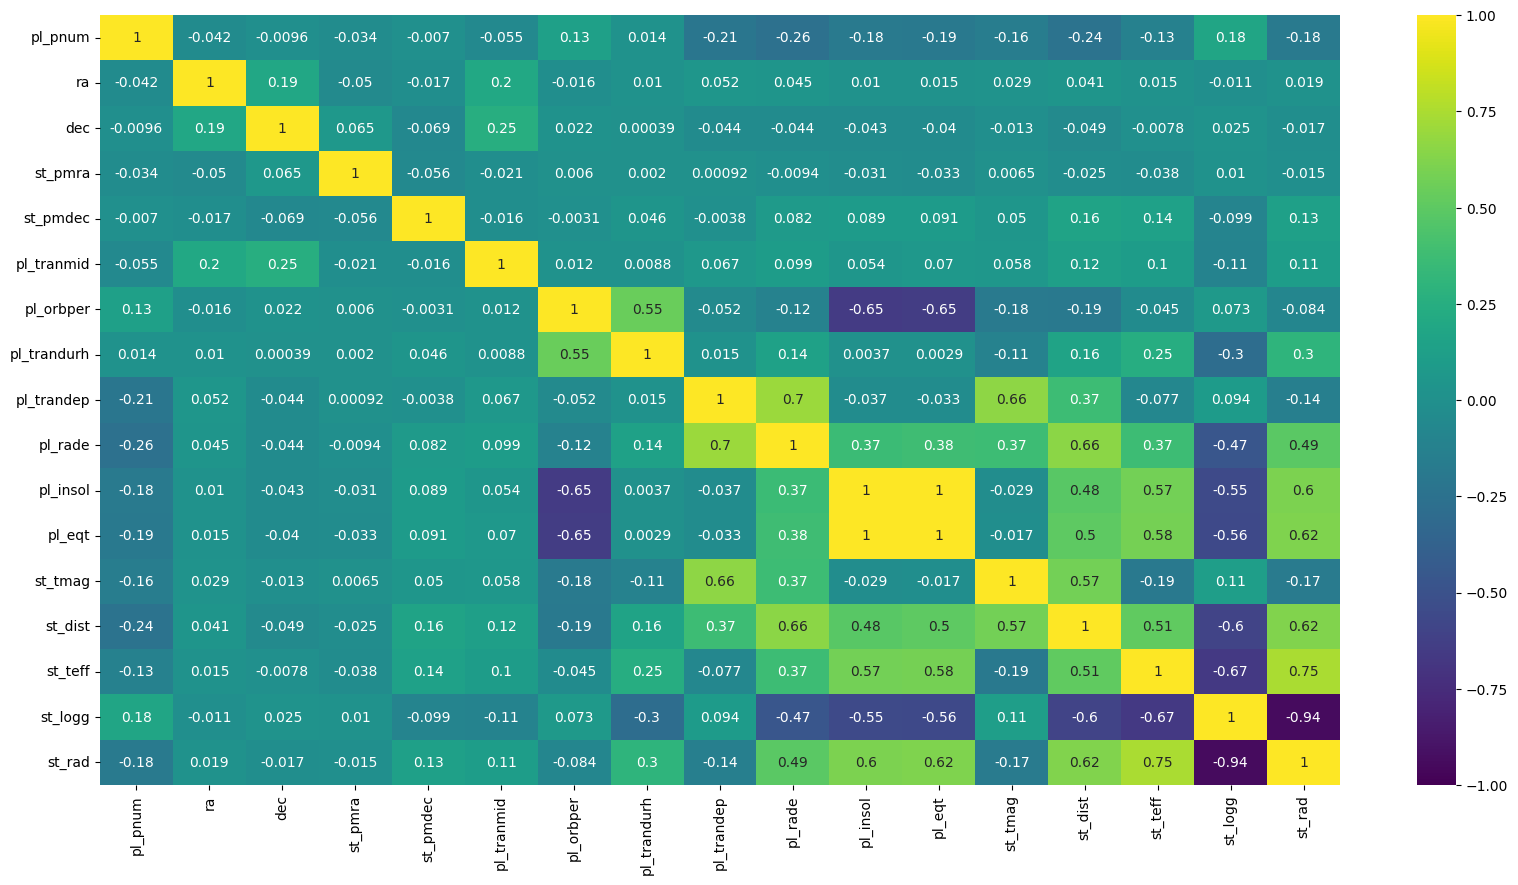

In [203]:
plt.figure(figsize = (20, 10))
sns.heatmap(toi_cleaned.corr('spearman', numeric_only = True), vmin = -1, vmax = 1, annot = True, cmap = 'viridis')

<Axes: >

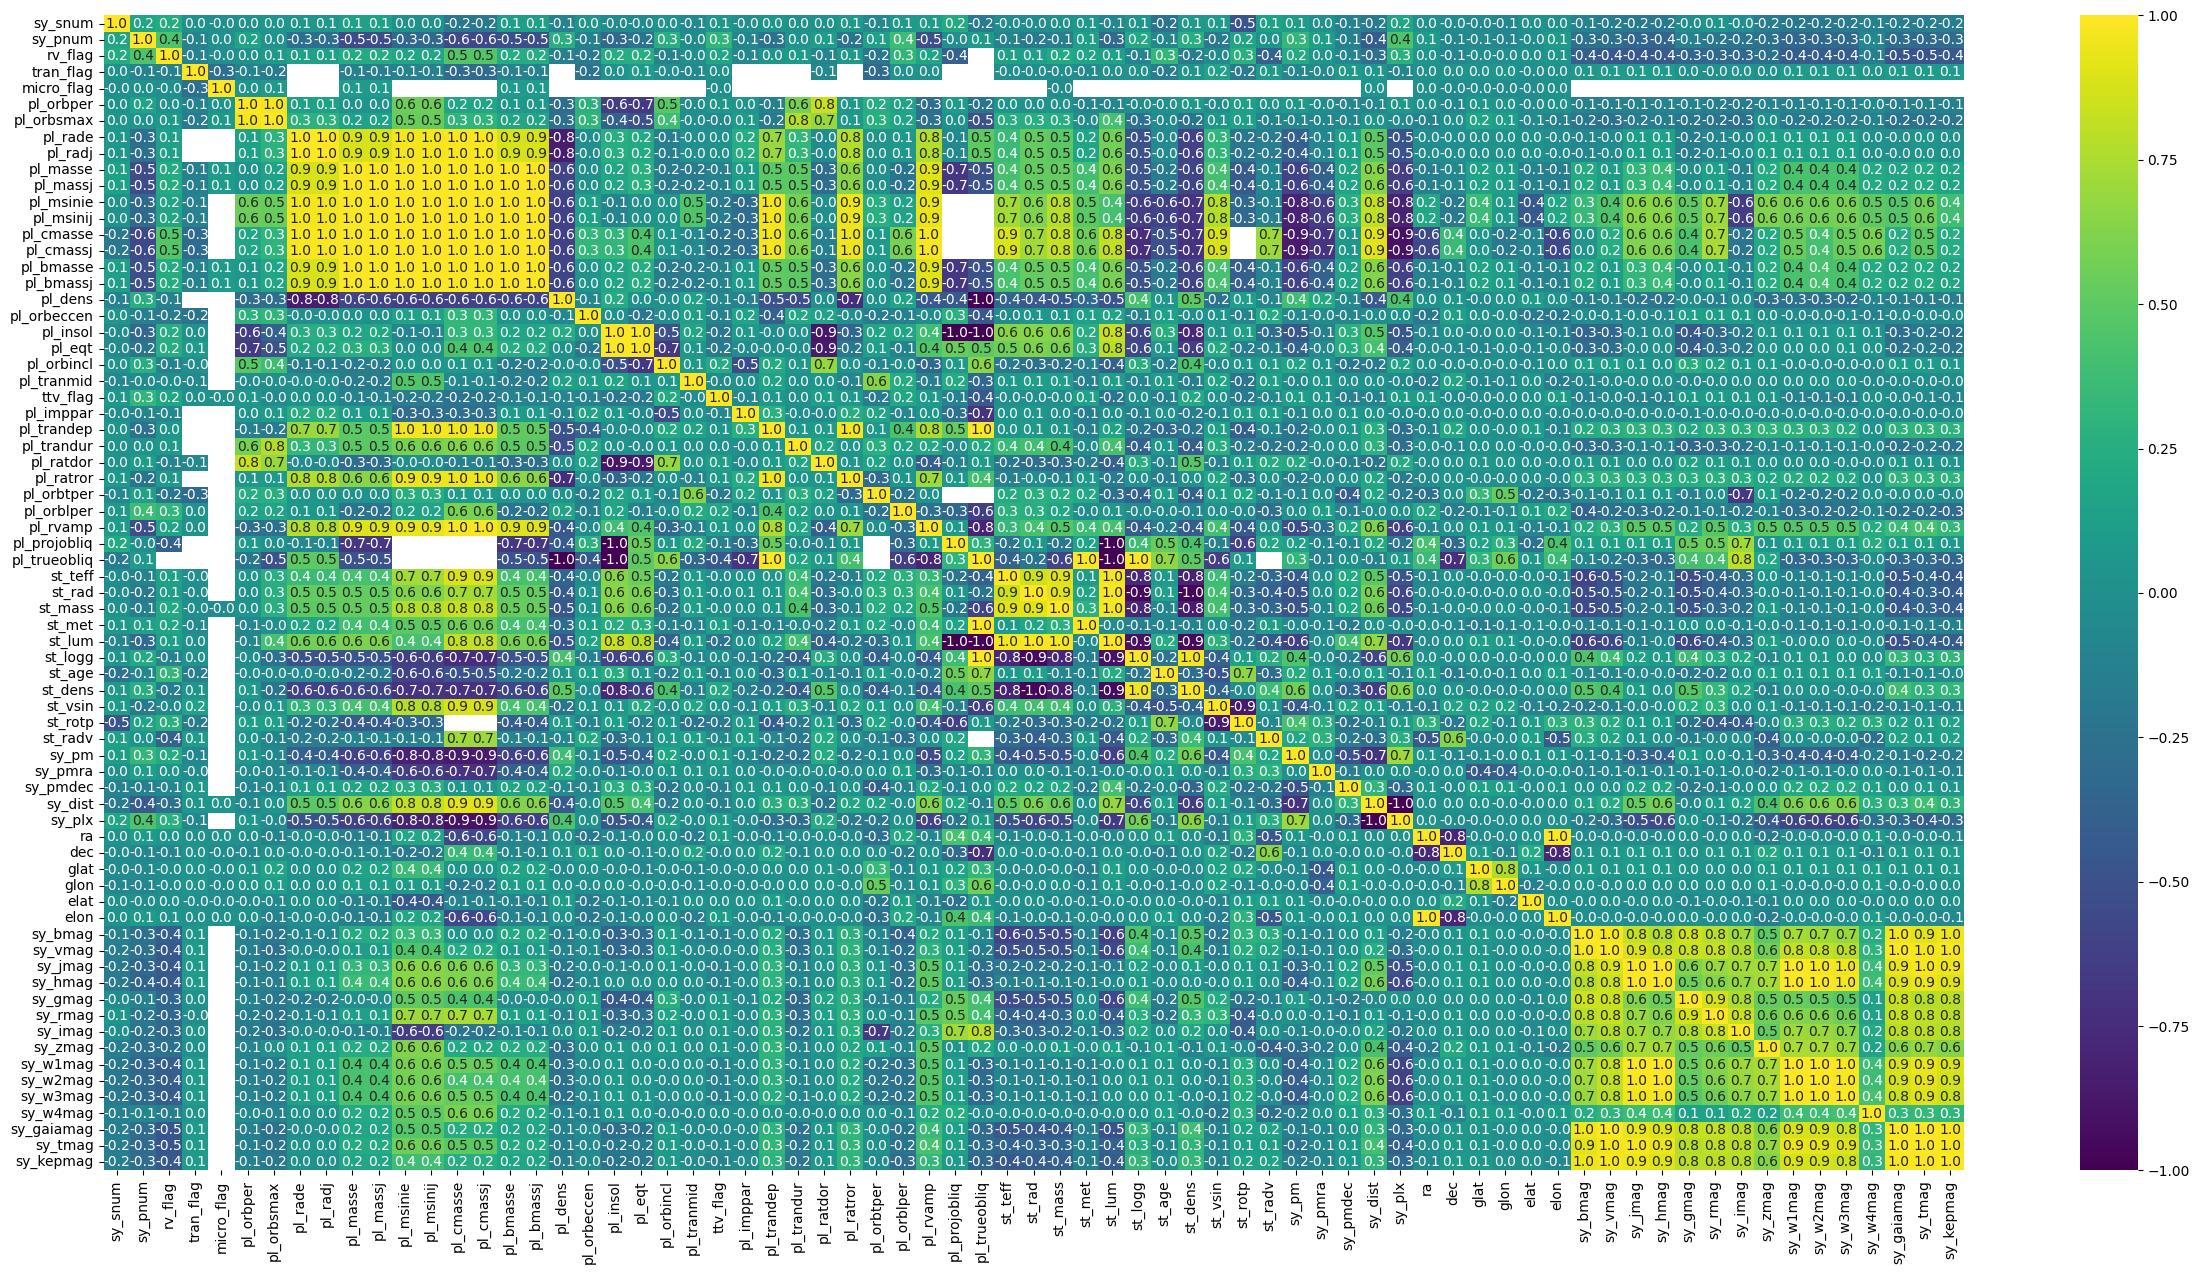

In [204]:
plt.figure(figsize = (30, 15))
sns.heatmap(k2_cleaned.corr('spearman', numeric_only = True), vmin = -1, vmax = 1, annot = True, cmap = 'viridis', fmt = '.1f')

<Axes: xlabel='koi_prad', ylabel='Count'>

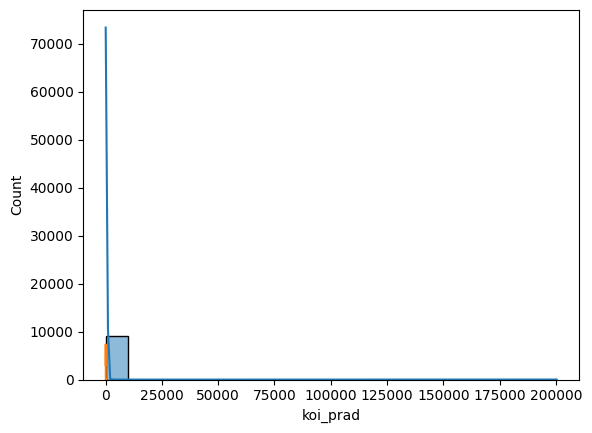

In [205]:
sns.histplot(data = koi_cleaned, x = 'koi_prad', bins = 20, kde = True)
sns.histplot(data = toi_cleaned, x = 'pl_rade', bins = 20, kde = True)